# Globally Averaged Ocean Temperature and Salinity

In [24]:
from mom6_tools.DiagsCase import DiagsCase
import yaml
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib 
import numpy as np
import xarray as xr

In [25]:
# Read in the yaml file
diag_config_yml_path = "diag_config.yml"
diag_config_yml = yaml.load(open(diag_config_yml_path,'r'), Loader=yaml.Loader)

In [26]:
# Create the case instance
dcase = DiagsCase(diag_config_yml['Case'])
print('Casename is:', dcase.casename)
RUNDIR = dcase.get_value('RUNDIR')
print('RUNDIR:', RUNDIR)

Casename is: bmom.e20.BMOM.f09_t061.long_run_mct.003
RUNDIR: /glade/scratch/gmarques/bmom.e20.BMOM.f09_t061.long_run_mct.003/run


In [27]:
# load data
ds = xr.open_mfdataset(RUNDIR+'/*.mom6.hm_*nc',decode_times=False)

### Time series

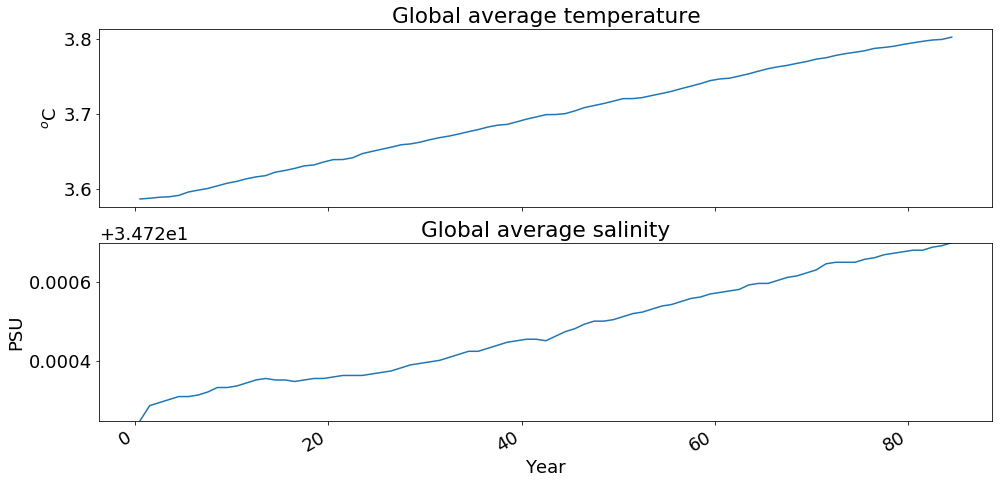

In [28]:
matplotlib.rcParams.update({'font.size': 18})
fig, axes = plt.subplots(nrows=2, figsize=(16, 8))
ax = axes[0]
ax.plot(ds.time.data/365., ds.thetaoga[:,0].data)
ax.set_ylabel(r'$^o$C')
ax.set_title("Global average temperature")
fig.autofmt_xdate()

ax = axes[1]
ax.plot(ds.time.data/365., ds.soga[:,0].data)
ax.set_title("Global average salinity")
ax.set_ylabel('PSU')
ax.set_ylim(ds.soga.min(),ds.soga.max())
ax.set_xlabel('Year')
fig.autofmt_xdate()